In [164]:
from pyedflib import highlevel
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности x(nT). Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;	
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные; 
- $W = e^{-2\pi j / N}$ – поворотный множитель.


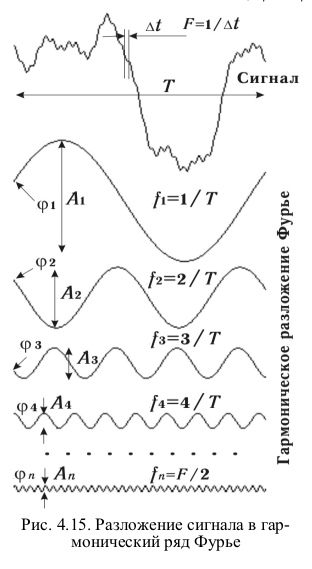

In [169]:
Image.open('spctr1.jpg')

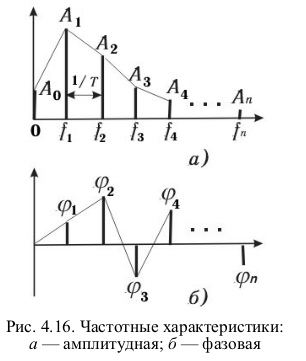

In [170]:
Image.open('spctr2.jpg')

In [166]:
signals_1, signal_headers_1, header_1 = highlevel.read_edf('Subject00_1.edf')
signals_2, signal_headers_2, header_2 = highlevel.read_edf('Subject00_2.edf')

In [155]:
header_1

{'technician': 'Doctor',
 'recording_additional': '',
 'patientname': 'Subject0',
 'patient_additional': '',
 'patientcode': '0',
 'equipment': 'NeuroCom Professional 3.0.0',
 'admincode': '0',
 'gender': 'Male',
 'startdate': datetime.datetime(2011, 1, 1, 0, 0),
 'birthdate': '01 jan 1990',
 'annotations': []}

In [156]:
#before
O1_1 = signals_1[14]
O2_1 = signals_1[15]
P3_1 = signals_1[12]
P4_1 = signals_1[13]

#after
O1_2 = signals_2[14]
O2_2 = signals_2[15]
P3_2 = signals_2[12]
P4_2 = signals_2[13]


In [157]:
from scipy.fftpack import fft, ifft, fftshift

def frequency_characteristics (x):
    # Forward FFT
    N = 100
    xFFT = fftshift(fft(x, N))
    # Magnitude spectrum
    xA = np.abs(xFFT)
    # Phase spectrum
    xF = np.angle(xFFT)
    return [x, xA, xF]

def draw_gr(xT_1, xT_2):
    fig = plt.figure(figsize=(12, 6), dpi=80)
    lst_title = ['Signal', 'Spectrum', 'Phase']
    num_1 = [1, 3, 5]
    num_2 = [2, 4, 6]
    
    for i, sig in enumerate(xT_1):
        plt.subplot(3, 2, int(num_1[i]))
        plt.ylabel('Level')
        plt.title(lst_title[i])
        if i == 0:
            plt.plot(sig)
            plt.xlabel('Time samples')
        else:
            plt.plot(sig)
            plt.xlabel('Freq samples')
            plt.xlim([0, N-1])
        plt.grid()
            
    for i, sig in enumerate(xT_2):
        plt.subplot(3, 2, int(num_2[i]))
        plt.ylabel('Level')
        plt.title(lst_title[i])
        if i == 0:
            plt.plot(sig)
            plt.xlabel('Time samples')
        else:
            plt.plot(sig)
            plt.xlabel('Freq samples')
            plt.xlim([0, N-1])
        plt.grid()
    plt.tight_layout()
    

### Сравнение датчиков O1

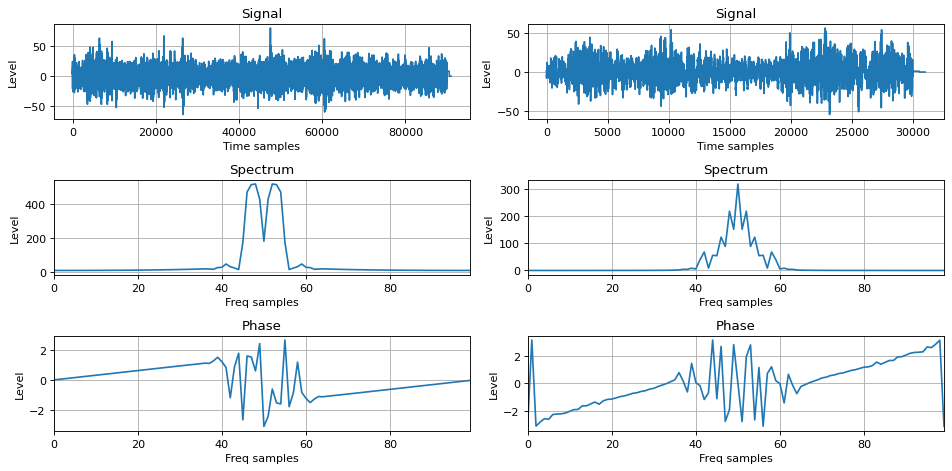

In [159]:
xT_1 = frequency_characteristics(O1_1)
xT_2 = frequency_characteristics(O1_2)

draw_gr(xT_1, xT_2)

### Сравнение датчиков O2

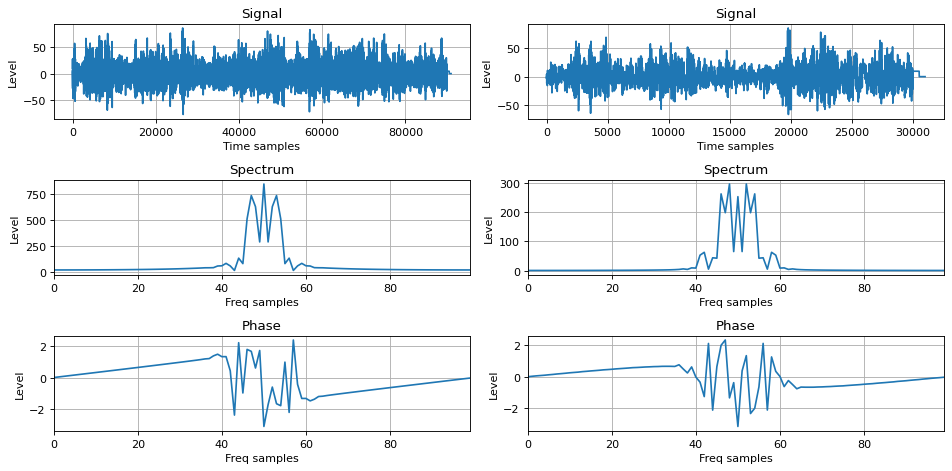

In [160]:
xT_1 = frequency_characteristics(O2_1)
xT_2 = frequency_characteristics(O2_2)

draw_gr(xT_1, xT_2)

### Сравнение датчиков P3

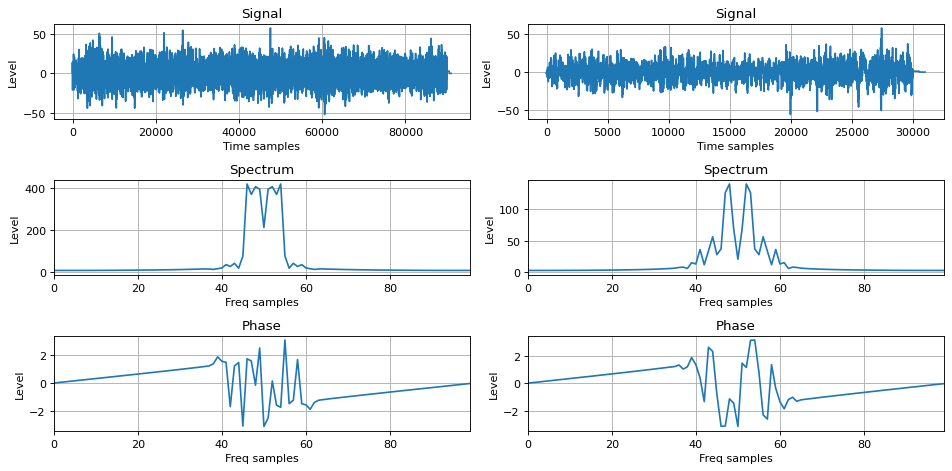

In [161]:
xT_1 = frequency_characteristics(P3_1)
xT_2 = frequency_characteristics(P3_2)

draw_gr(xT_1, xT_2)

### Сравнение датчиков P4

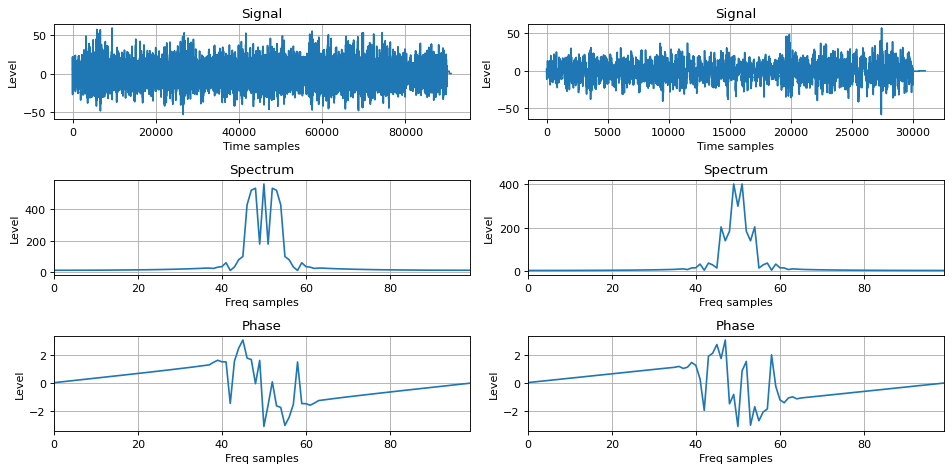

In [162]:
xT_1 = frequency_characteristics(P4_1)
xT_2 = frequency_characteristics(P4_2)

draw_gr(xT_1, xT_2)